In [1]:
from fastai2.vision.all import *

# Single label classification

In [2]:
path = untar_data(URLs.PETS)

In [3]:
files = get_image_files(path/"images")
len(files)

7390

In [4]:
files[0],files[6]

(Path('/home/javi/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_102.jpg'),
 Path('/home/javi/.fastai/data/oxford-iiit-pet/images/great_pyrenees_93.jpg'))

In [5]:
def label_func(f): return f[0].isupper()

In [6]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

In [7]:
dls.vocab

(#2) [False,True]

In [8]:
dls[0].vocab

(#2) [False,True]

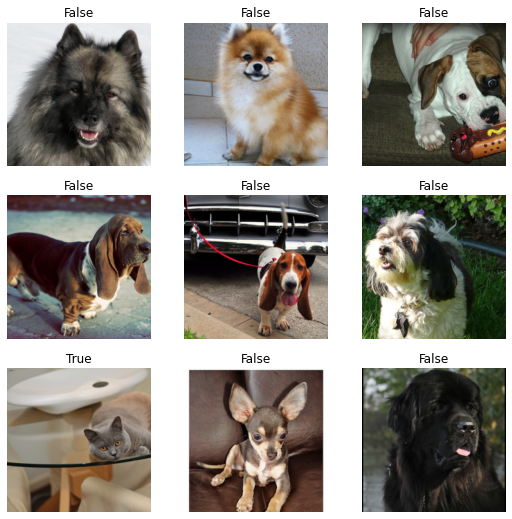

In [9]:
dls.show_batch()

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.128375,0.024191,0.007442,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.059068,0.017928,0.007442,00:17


In [11]:
learn.dls[1].vocab

(#2) [False,True]

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

In [13]:
interp.vocab

(#2) [False,True]

In [43]:
ClassificationInterpretation??

In [ ]:
%debug ClassificationInterpretation.from_learner(learn)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> s
--Call--
> /usr/lib/python3.8/site-packages/fastai2/interpret.py(22)from_learner()
     20         store_attr(self, "dl,inputs,preds,targs,decoded,losses")
     21 
---> 22     @classmethod
     23     def from_learner(cls, learn, ds_idx=1, dl=None, act=None):
     24         "Construct interpretatio object from a learner"

ipdb> s
> /usr/lib/python3.8/site-packages/fastai2/interpret.py(25)from_learner()
     23     def from_learner(cls, learn, ds_idx=1, dl=None, act=None):
     24         "Construct interpretatio object from a learner"
---> 25         if dl is None: dl = learn.dls[ds_idx]
     26         return cls(dl, *learn.get_preds(dl=dl, with_input=True, with_loss=True, with_decoded=True, act=None))
     27 

ipdb> s
--Call--
> /usr/lib/python3.8/site-packages/fastai2/data/core.py(131)__getitem__()
    129         self.device = device
    130 
--> 131     def __getitem__(self, i): return 

ipdb> s
> /usr/lib/python3.8/site-packages/fastai2/learner.py(220)get_preds()
    218                   inner=False, reorder=True, **kwargs):
    219         if dl is None: dl = self.dls[ds_idx].new(shuffled=False, drop_last=False)
--> 220         if reorder and hasattr(dl, 'get_idxs'):
    221             idxs = dl.get_idxs()
    222             dl = dl.new(get_idxs = _ConstantFunc(idxs))

ipdb> s
> /usr/lib/python3.8/site-packages/fastai2/learner.py(221)get_preds()
    219         if dl is None: dl = self.dls[ds_idx].new(shuffled=False, drop_last=False)
    220         if reorder and hasattr(dl, 'get_idxs'):
--> 221             idxs = dl.get_idxs()
    222             dl = dl.new(get_idxs = _ConstantFunc(idxs))
    223         cb = GatherPredsCallback(with_input=with_input, with_loss=with_loss, **kwargs)

ipdb> s
--Call--
> /usr/lib/python3.8/site-packages/fastai2/data/load.py(85)get_idxs()
     83         return self.n//self.bs + (0 if self.drop_last or self.n%self.bs==0 else 1)
   

In [32]:
interp.vocab

(#2) [False,True]

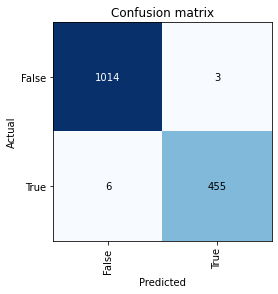

In [19]:
interp.plot_confusion_matrix()

In [11]:
source = untar_data(URLs.PETS)
items = get_image_files(source/"images")

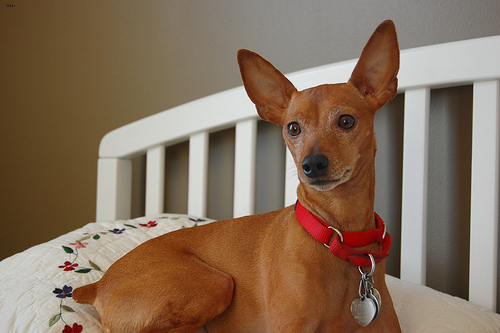

In [12]:
img = PILImage.create(items[0])
img

In [13]:
from albumentations import ShiftScaleRotate

In [18]:
class AlbumentationsTransform(Transform):
    def __init__(self, aug): self.aug = aug
    def encodes(self, img: PILImage):
        aug_img = self.aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

In [ ]:
class AlbumentationsItemTransform(ItemTransform):
    def __init__(self, aug): self.aug = aug
    def encodes(self, x):
        img,mask = x
        aug = self.aug(image=np.array(img), mask=np.array(mask))
        return PILImage.create(aug["image"]), PILMask.create(aug["mask"])

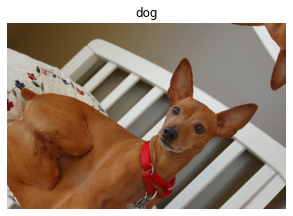

In [19]:
tfm = AlbumentationsTransform(ShiftScaleRotate(p=1))
a,b = tfm((img, 'dog'))
show_image(a, title=b);

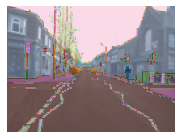

In [21]:
cv_source = untar_data(URLs.CAMVID_TINY)
cv_items = get_image_files(cv_source/'images')
img = PILImage.create(cv_items[0])
mask = PILMask.create(cv_source/'labels'/f'{cv_items[0].stem}_P{cv_items[0].suffix}')
ax = img.show()
ax = mask.show(ctx=ax)